In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [4]:
URL = "https://datahub.io/machine-learning/adult/r/adult.csv"

raw_data = os.path.join("adult_csv.csv")
df_raw = pd.read_csv(raw_data, sep = ",")

In [6]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler

In [7]:
workclass_count = df_raw["workclass"].value_counts()
Nan_workclass = workclass_count[workclass_count < 100].index.to_list()

In [8]:
df_raw["workclass"] = df_raw["workclass"].astype("object")
df_raw.loc[df_raw.query(f"workclass == @Nan_workclass").index, "workclass"] = "None"

In [9]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
None                   31
Name: workclass, dtype: int64

In [10]:
df_raw.rename(columns={"marital-status":"marital_status"}, inplace=True)

In [11]:
marital_status_count = df_raw["marital_status"].value_counts()
rare_marital_status = marital_status_count[marital_status_count < 1000].index.to_list()

In [12]:
rare_marital_status

['Married-spouse-absent', 'Married-AF-spouse']

In [13]:
df_raw["marital_status"] = df_raw["marital_status"].astype("object")
df_raw.loc[df_raw.query(f"marital_status == @rare_marital_status").index, "marital_status"] = "Married-civ-spouse"

### Pipeline Start

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier

import time

In [74]:
train_data, test_data = train_test_split(df_raw, test_size=0.8, random_state=42)
train_dist = pd.DataFrame(train_data["class"].value_counts() / len(train_data))
train_dist.columns = ["class_train_perc"]
display(train_dist[:2])

,class_train_perc
<=50K,0.759111
>50K,0.240889


In [53]:
num_features = ["fnlwgt", "education-num"]
cat_features = ["age", "workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "native-country"]

y = ["class"]
X = [*num_features, *cat_features]

In [40]:
train_data["native-country"].value_counts()

United-States                 8754
Mexico                         184
Philippines                     64
Germany                         48
Puerto-Rico                     38
Canada                          35
China                           29
India                           29
El-Salvador                     26
South                           25
Cuba                            24
England                         23
Italy                           20
Guatemala                       20
Haiti                           20
Dominican-Republic              20
Columbia                        18
Jamaica                         16
Poland                          15
Ecuador                         15
Taiwan                          15
Japan                           14
Vietnam                         13
Portugal                        13
Nicaragua                       12
Iran                            11
Ireland                         10
Greece                           9
Peru                

In [39]:
df_raw["native-country"].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [50]:
indexNames = df_raw[df_raw['native-country'] == 'Holand-Netherlands'].index

df_raw.drop(indexNames , inplace=True)

In [51]:
df_raw["native-country"].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [58]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
cat_transformers = [OneHotEncoder()]

In [59]:
transformer_numerical = Pipeline(steps = [
    ('num_trans', StandardScaler())
])
transformer_categorical = Pipeline(steps = [
    ('cat_trans', OneHotEncoder())
])

In [60]:
preprocessor = ColumnTransformer(transformers= [
    ('numerical', transformer_numerical, num_features),
    ('categorical', transformer_categorical, cat_features)
])

In [61]:
pipeline_test = Pipeline( steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())    
    ])

In [62]:
pipeline_test.fit((train_data[X]), train_data[y])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_trans',
                                                                   StandardScaler())]),
                                                  ['fnlwgt', 'education-num']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_trans',
                                                                   OneHotEncoder())]),
                                                  ['age', 'workclass',
                                                   'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'capitalgain',
                                                   'capitalloss',
                                                   'hoursperweek',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier())])

In [63]:
pipeline_test.predict((test_data[X]))

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [64]:
pipeline_test.score((train_data[X]), train_data[y])

0.9997952497952498

In [65]:
classifiers = [
    DecisionTreeClassifier(random_state=42),
    SVC(),
    LogisticRegression(max_iter=500),
    KNeighborsClassifier(2)]

In [69]:
# 1. Erstelle Df um Ergebnisse zu storen
models_df = pd.DataFrame()

# 2. Pipeline Prep
Pipeline_Cl = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('classifier',  None)
])

# 3. For Schleife per Model
for model in classifiers:
    for num_tr in scalers:
        for cat_tr in cat_transformers:
            #testen der models und num/cat transformers
            Pipeline_Cl_params = {
                'preprocessor__numerical__num_trans': num_tr,
                'preprocessor__categorical__cat_trans': cat_tr,
                'classifier': model
            }
            Pipeline_Cl.set_params(**Pipeline_Cl_params)
            
            #check performnce und fit
            start_time = time.time()
            fit = Pipeline_Cl.fit(test_data[X], test_data[y])
            end_time = time.time()
            score = Pipeline_Cl.score(test_data[X], test_data[y])
            
            parameter_dict = {
                            'model': model.__class__.__name__,
                            'num_trans': num_tr.__class__.__name__,
                            'cat_trans': cat_tr.__class__.__name__,
                            'score': score,
                            'time_elapsed': end_time - start_time
                            
            }
            
            models_df = models_df.append(pd.DataFrame(parameter_dict, index=[0]))
                    
models_df.reset_index(drop=True, inplace=True)

C:\Users\Lennart Reschke\AppData\Local\Temp\ipykernel_21100\2968445251.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(parameter_dict, index=[0]))
C:\Users\Lennart Reschke\AppData\Local\Temp\ipykernel_21100\2968445251.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(parameter_dict, index=[0]))
C:\Users\Lennart Reschke\AppData\Local\Temp\ipykernel_21100\2968445251.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(parameter_dict, index=[0]))
c:\Users\Lennart Reschke\anaconda3\envs\ads3-06-dash\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was p

In [70]:
models_df.sort_values('score', ascending=False)

,model,num_trans,cat_trans,score,time_elapsed
0,DecisionTreeClassifier,StandardScaler,OneHotEncoder,0.999642,3.388937
1,DecisionTreeClassifier,MinMaxScaler,OneHotEncoder,0.999642,3.168527
2,DecisionTreeClassifier,RobustScaler,OneHotEncoder,0.999642,3.450768
10,KNeighborsClassifier,MinMaxScaler,OneHotEncoder,0.894659,0.809622
11,KNeighborsClassifier,RobustScaler,OneHotEncoder,0.893533,0.199883
9,KNeighborsClassifier,StandardScaler,OneHotEncoder,0.893098,0.187029
3,SVC,StandardScaler,OneHotEncoder,0.865918,120.382941
5,SVC,RobustScaler,OneHotEncoder,0.865892,112.585103
4,SVC,MinMaxScaler,OneHotEncoder,0.865508,95.821992
6,LogisticRegression,StandardScaler,OneHotEncoder,0.858752,1.310477


In [72]:
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [78]:
y_pred = Pipeline_Cl.predict(test_data[X])

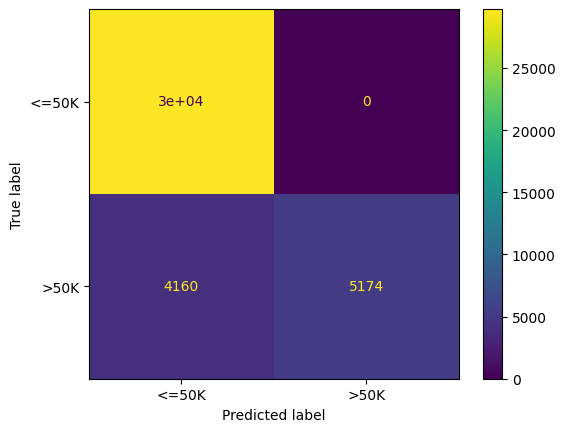

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    test_data[y], y_pred
)
plt.show()